<a href="https://colab.research.google.com/github/gabipasse/ecommerce-logic/blob/main/deep_learning_introducao_com_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

##Explorando o dataset

In [2]:
#acessar o dataset facion_mnist presente no keras
dataset = keras.datasets.fashion_mnist

In [3]:
#carregando o dataset facion_mnist. Como dataset.load_data retornar tuplas, utilizo 4 variaveis para armazenar os dados
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#checando se os shapes dos arrays sao correspondentes (treino com treino e teste com teste)
for info in [imagens_treino, identificacoes_treino, imagens_teste, identificacoes_teste]:

  print(info.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '9')

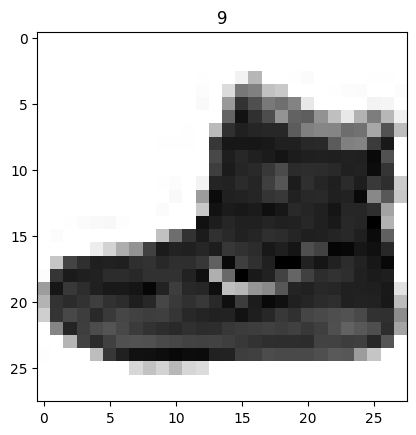

In [5]:
plt.imshow(imagens_treino[0], cmap="gray_r")

plt.title(identificacoes_treino[0])

In [6]:
print(identificacoes_treino.min())

0


In [7]:
print(identificacoes_treino.max())

9


In [8]:
#exibindo a quantidade de classes preditas
total_de_classificadores = 10

In [9]:
#criando lista para associar labels numericas a palavras
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

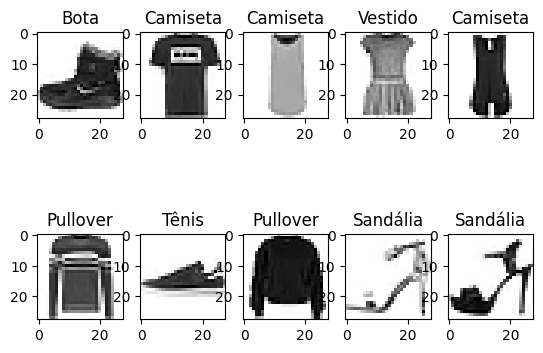

In [10]:
#checando a associacao entre labels e palavras para 10 imagens exemplo
for imagem in range(10):

  plt.subplot(2, 5, imagem+1)

  plt.imshow(imagens_treino[imagem], cmap="gray_r")

  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

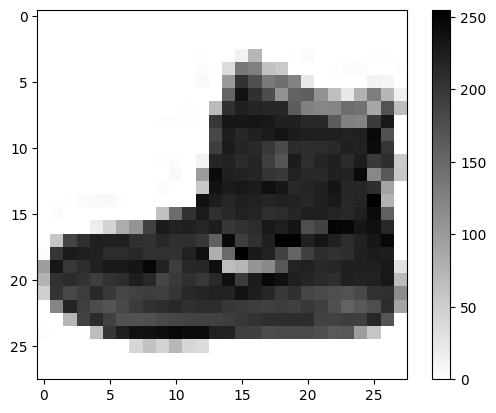

In [11]:
#checando a variacao do valor (tons de cinza) de cada pixel presente na imagem exemplo
plt.imshow(imagens_treino[0], cmap="gray_r")
plt.colorbar()

In [12]:
#normalizando as imagens. Colocando os valores de cada pixel entre 1 e 0
imagens_treino = imagens_treino/255.0

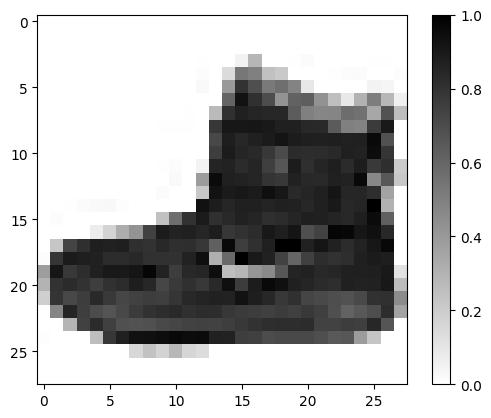

In [13]:
#checando novamente a variacao do valor (tons de cinza) de cada pixel presente na imagem exemplo
plt.imshow(imagens_treino[0], cmap="gray_r")
plt.colorbar()

##Estruturando a rede neural

In [14]:
#definindo modelo do tipo sequential
modelo = keras.Sequential()

In [15]:
#camada de entrada
modelo.add(keras.layers.Flatten(input_shape=(28, 28)))

In [16]:
#camada de processamento (dense = totalmente conectada)
#utilizo relu para possibilitar análise nao linear dos dados
modelo.add(keras.layers.Dense(256, activation = 'relu'))

In [17]:
#utilizando camada dropout para diminuir a ocorrencia de overfitting (forma de normalizacao)
modelo.add(keras.layers.Dropout(0.2))

In [18]:
#camada de saida utilizando softmax para comparar probabilidade de pertencimento a cada uma das classes
#utilizo 10 neurons do tipo Dense para representar probabilidade de pertencimento a cada uma das classes
modelo.add(keras.layers.Dense(10, activation = 'softmax'))

In [19]:
#compilando o modelo
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5271 - accuracy: 0.8116 - val_loss: 0.4308 - val_accuracy: 0.8484
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3949 - accuracy: 0.8555 - val_loss: 0.3616 - val_accuracy: 0.8686
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3609 - accuracy: 0.8674 - val_loss: 0.3576 - val_accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3394 - accuracy: 0.8734 - val_loss: 0.3408 - val_accuracy: 0.8770
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3192 - accuracy: 0.8808 - val_loss: 0.3297 - val_accuracy: 0.8812


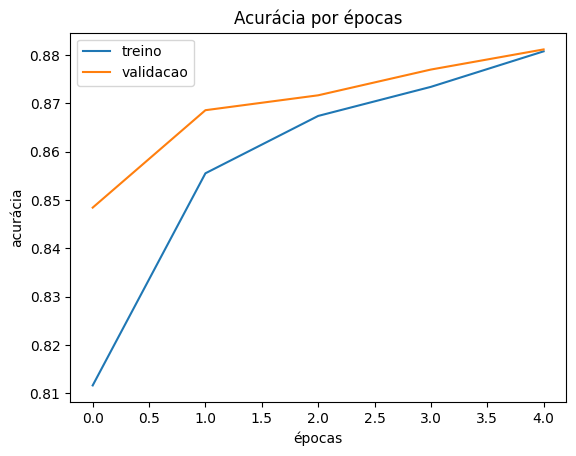

In [21]:
#plotando grafico para visualizar a variação da acuracia por epocas tanto do treino quanto da validacao
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])

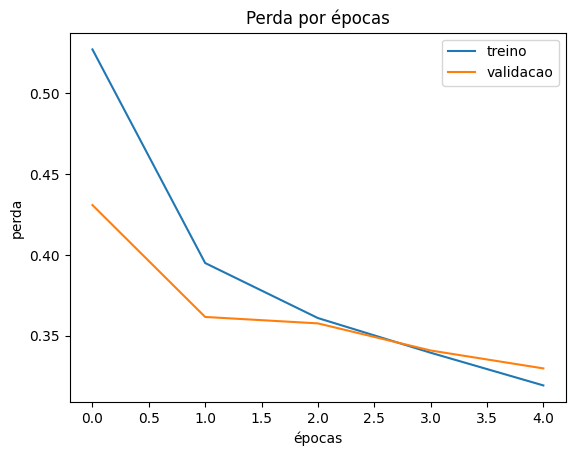

In [22]:
#plotando grafico para visualizar a variação da perda por epocas tanto do treino quanto da validacao
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])

In [23]:
#realizando a predicao das imagens do set teste
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


In [24]:
#visualizando a predição do model e identificador real para a primeira imagem
print(f'predito: {nomes_de_classificacoes[np.argmax(testes[0])]}')
print(f'real: {nomes_de_classificacoes[identificacoes_teste[0]]}')

predito: Bota
real: Bota


In [25]:
#checando o valor da perda e acuracia de acordo com o set de teste
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 3ms/step - loss: 61.2829 - accuracy: 0.8577


In [26]:
#salvando o modelo
modelo.save('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
#salvando o sumario do modelo em uma variavel
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Explorando modificações no modelo

In [28]:
#salvando os pesos da camada dense (primeira camada dense) em uma variavel
pesos_camada_dense = modelo.layers[1].get_weights()[0]

In [29]:
#acessando os pesos presentes na 2 camada do modelo (primeira camada dense)
pesos_camada_dense.shape

(784, 256)

In [30]:
#salvando os vieses da camada dense (primeira camada dense) em uma variavel
vieses_camada_dense = modelo.layers[1].get_weights()[1]

In [31]:
#acessando os vieses presentes na 2 camada do modelo (primeira camada dense)
vieses_camada_dense.shape

(256,)

In [32]:
#criando um array com apenas zeros para substituir os pesos da segunda camada do modelo (dense)
pesos_camada_dense_zerados = np.zeros(shape = pesos_camada_dense.shape)

In [33]:
#checando se o shape do array de zeros gerado acima é igual ao do array pesos_camada_dense original
pesos_camada_dense_zerados.shape

(784, 256)

In [34]:
#checando se o array realmente é composto apenas de zeros
np.all(pesos_camada_dense_zerados == 0)

True

In [35]:
#utilizando o metodo set em questao para modificar os pesos da camada dense do modelo (matendo os vieses originais)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

In [36]:
#checando se modificacao anterior foi realizada com sucesso
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 0.01195455,  0.02051665,  0.24272372,  0.17140085,  0.19733939,
         0.36148253, -0.00689734,  0.00703893,  0.24846709, -0.04935306,
         0.19141223,  0.456058  ,  0.10983273,  0.14844824, -0.19752464,
         0.34132758,  0.21708089,  0.09550293, -0.05585821,  0.15908006,
        -0.21207091,  0.2499862 ,  0.24279352, -0.01245642,  0.5089754 ,
         0.3438534 ,  0.37757316,  0.26571602,  0.1705037 , -0.14057297,
        -0.02097649, -0.05936677,  0.1283873 , -0.09249108,  0.20893537,
         0.14255723, -0.00786027,  0.2803254 , -0.35415354, -0.00348679,
        -0.01041034,  0.29434967,  0.11982286,  0.16256098,  0.22842932,
         0.1163177 ,  0.0617381 ,  0.32415566,  0.28149414,  0.25227094,
      

In [37]:
#compilando o modelo
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [38]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5441 - accuracy: 0.8044 - val_loss: 0.4403 - val_accuracy: 0.8418
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4150 - accuracy: 0.8476 - val_loss: 0.3719 - val_accuracy: 0.8634
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3794 - accuracy: 0.8614 - val_loss: 0.3739 - val_accuracy: 0.8609
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3577 - accuracy: 0.8702 - val_loss: 0.3551 - val_accuracy: 0.8698
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3425 - accuracy: 0.8726 - val_loss: 0.3454 - val_accuracy: 0.8753


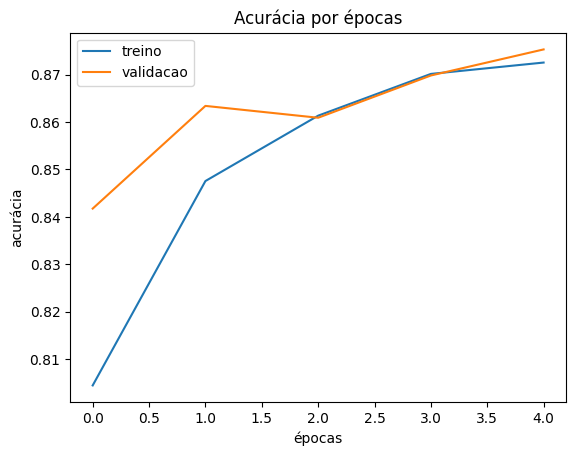

In [39]:
#plotando grafico para visualizar a variação da acuracia por epocas tanto do treino quanto da validacao
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])

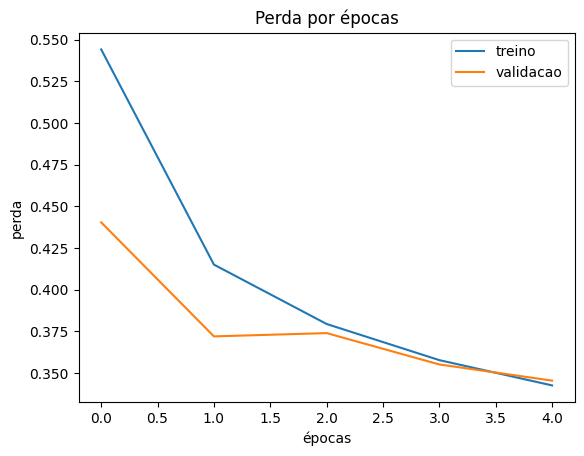

In [40]:
#plotando grafico para visualizar a variação da perda por epocas tanto do treino quanto da validacao
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])

In [41]:
#criando um array com numeros gerados aleatoriamente para substituir os pesos da segunda camada do modelo (dense)
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

In [42]:
#utilizando o metodo set em questao para modificar os pesos da camada dense do modelo (matendo os vieses originais)
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

In [43]:
#compilando o modelo
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 117.7769 - accuracy: 0.4068 - val_loss: 16.8157 - val_accuracy: 0.7162
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 31.0933 - accuracy: 0.6291 - val_loss: 9.4153 - val_accuracy: 0.7625
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 14.3716 - accuracy: 0.6898 - val_loss: 6.2051 - val_accuracy: 0.7577
Epoch 4/5
1500/1500 [==============================] - 10s 6ms/step - loss: 7.3421 - accuracy: 0.7271 - val_loss: 3.4810 - val_accuracy: 0.8025
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 3.9412 - accuracy: 0.7506 - val_loss: 2.7604 - val_accuracy: 0.7919


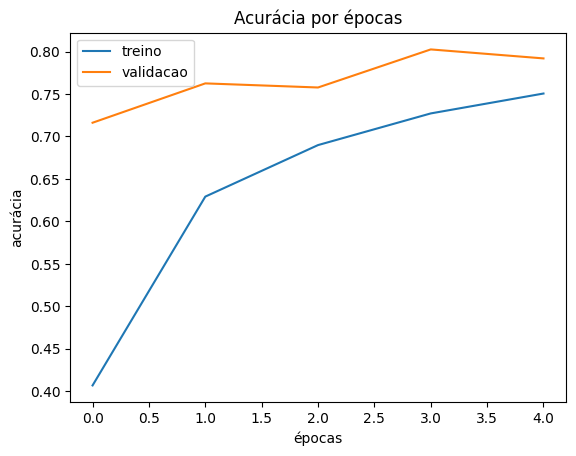

In [45]:
#plotando grafico para visualizar a variação da acuracia por epocas tanto do treino quanto da validacao
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])

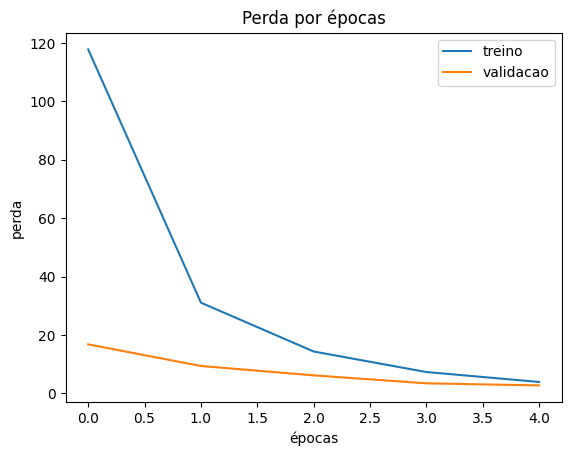

In [46]:
#plotando grafico para visualizar a variação da perda por epocas tanto do treino quanto da validacao
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])

In [47]:
#acessando a configuracao do modelO
modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

In [48]:
#é o inicializador de kernel que define como os pesos sao inicializados

In [49]:
#criando um array com apenas zeros para substituir os vieses da segunda camada do modelo (dense)
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)

In [50]:
#checando se o shape do array gerado anteriormente é igual ao do vieses_camada_dense
vieses_camada_dense_zerados.shape

(256,)

In [51]:
#checando se todos os valores do array acima sao realmente iguais a zero
np.all(vieses_camada_dense_zerados == 0)

True

In [52]:
#substituindo os pesos e vieses da camada dense totalmente por zeros
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

In [53]:
#compilando o modelo
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [54]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 2.4228 - accuracy: 0.1001 - val_loss: 2.3234 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3084 - accuracy: 0.1001 - val_loss: 2.3034 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 10s 6ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1003


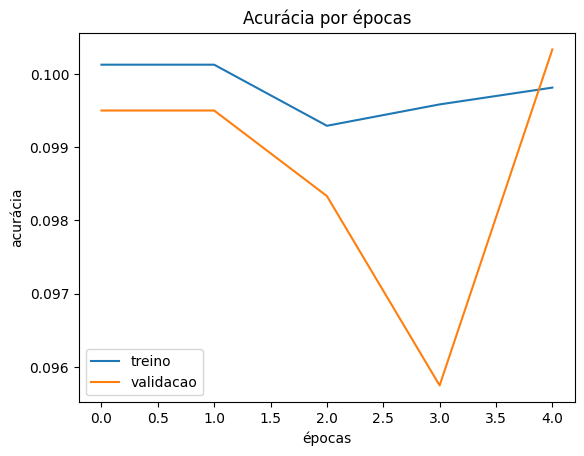

In [55]:
#plotando grafico para visualizar a variação da acuracia por epocas tanto do treino quanto da validacao
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])

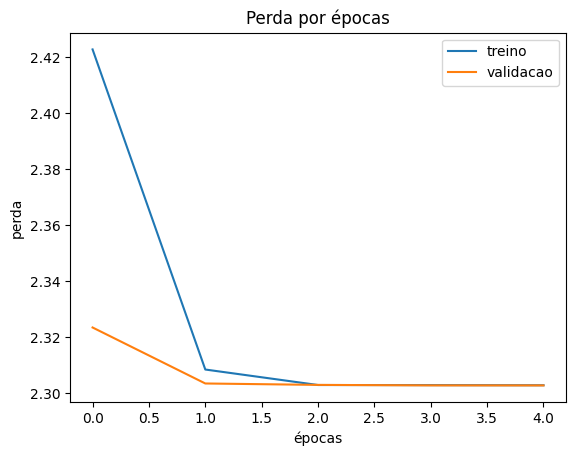

In [56]:
#plotando grafico para visualizar a variação da perda por epocas tanto do treino quanto da validacao
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])

In [57]:
#substituindo os pesos por valores aleatorios e os vieses totalmente por zeros
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [58]:
#compilando o modelo
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [59]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 38.9922 - accuracy: 0.4065 - val_loss: 6.1005 - val_accuracy: 0.6542
Epoch 2/5
1500/1500 [==============================] - 10s 6ms/step - loss: 11.2070 - accuracy: 0.5817 - val_loss: 4.5560 - val_accuracy: 0.6847
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 6.1959 - accuracy: 0.6414 - val_loss: 2.9281 - val_accuracy: 0.7073
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 3.6192 - accuracy: 0.6830 - val_loss: 2.2303 - val_accuracy: 0.7188
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.4043 - accuracy: 0.7170 - val_loss: 1.5735 - val_accuracy: 0.7613


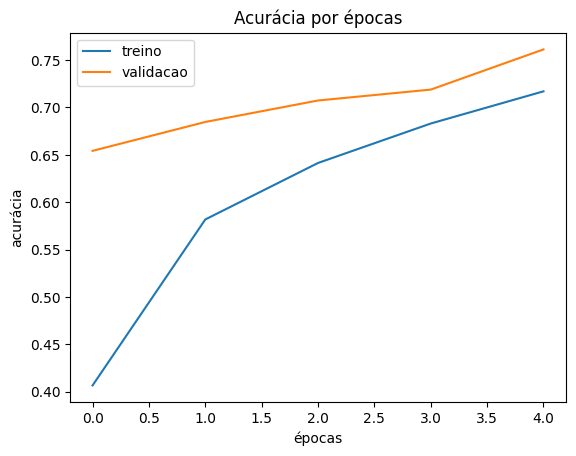

In [60]:
#plotando grafico para visualizar a variação da acuracia por epocas tanto do treino quanto da validacao
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])

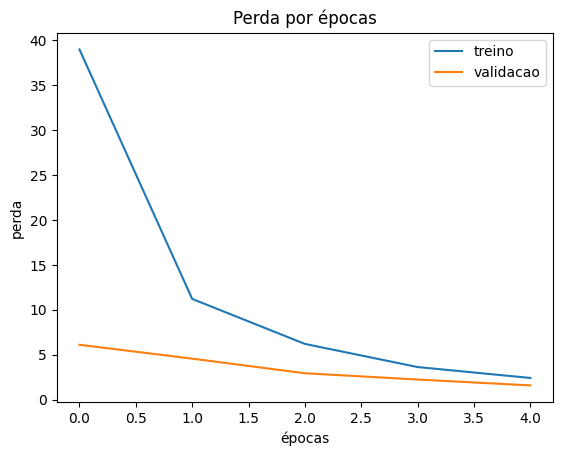

In [61]:
#plotando grafico para visualizar a variação da perda por epocas tanto do treino quanto da validacao
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])

In [70]:
#modificando o otimizador adam de acordo com alguns dos seus parametros (hiperparametros da rede neural)
adam = keras.optimizers.Adam(learning_rate = 0.5) #propositalmente alto para observar as diferencas que serão geradas

In [71]:
#compilando o modelo
modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [72]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 6.5704 - accuracy: 0.1141 - val_loss: 2.4376 - val_accuracy: 0.1004
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3560 - accuracy: 0.1018 - val_loss: 2.3473 - val_accuracy: 0.1004
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3621 - accuracy: 0.1003 - val_loss: 2.3509 - val_accuracy: 0.1006
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3576 - accuracy: 0.0996 - val_loss: 2.3748 - val_accuracy: 0.1006
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3624 - accuracy: 0.0990 - val_loss: 2.4535 - val_accuracy: 0.1006


In [73]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
#dessa vez modificando o argumento batch_size
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 480, epochs = 5, validation_split = 0.2)

Epoch 1/5
100/100 [==============================] - 4s 32ms/step - loss: 2.3194 - accuracy: 0.1010 - val_loss: 2.3080 - val_accuracy: 0.1030
Epoch 2/5
100/100 [==============================] - 3s 29ms/step - loss: 2.3073 - accuracy: 0.0994 - val_loss: 2.3105 - val_accuracy: 0.1013
Epoch 3/5
100/100 [==============================] - 2s 16ms/step - loss: 2.3070 - accuracy: 0.1012 - val_loss: 2.3090 - val_accuracy: 0.0983
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 2.3071 - accuracy: 0.0972 - val_loss: 2.3071 - val_accuracy: 0.1028
Epoch 5/5
100/100 [==============================] - 2s 22ms/step - loss: 2.3069 - accuracy: 0.0994 - val_loss: 2.3069 - val_accuracy: 0.1013


In [74]:
#modificando o otimizador adam de acordo com alguns dos seus parametros (hiperparametros da rede neural)
adam = keras.optimizers.Adam(learning_rate = 0.002)

In [75]:
#compilando o modelo
modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [76]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
#dessa vez modificando o argumento batch_size
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 480, epochs = 5, validation_split = 0.2)

Epoch 1/5
100/100 [==============================] - 5s 26ms/step - loss: 2.3041 - accuracy: 0.0997 - val_loss: 2.3039 - val_accuracy: 0.1013
Epoch 2/5
100/100 [==============================] - 2s 17ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3037 - val_accuracy: 0.0958
Epoch 3/5
100/100 [==============================] - 2s 16ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3037 - val_accuracy: 0.0958
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3037 - val_accuracy: 0.0958
Epoch 5/5
100/100 [==============================] - 2s 24ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3037 - val_accuracy: 0.0958


In [78]:
#definindo o callback early stop para detectar possivel convergimento precoce da rede em relacao ao loss de validacao
callbacks = [keras.callbacks.EarlyStopping(monitor='val_stop')] #utilizo lista pois posso utilizar mais de 1 callback ao mesmo tempo

In [79]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
#dessa vez modificando o argumento batch_size
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 480, epochs = 5, validation_split = 0.2,
                       callbacks = callbacks)

Epoch 1/5
 99/100 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0992

100/100 [==============================] - 3s 28ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3036 - val_accuracy: 0.0958
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.1004

100/100 [==============================] - 2s 18ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3037 - val_accuracy: 0.0983
Epoch 3/5
 99/100 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.1005

100/100 [==============================] - 2s 16ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3037 - val_accuracy: 0.0958
Epoch 4/5
100/100 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0997

100/100 [==============================] - 2s 16ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3037 - val_accuracy: 0.0983
Epoch 5/5
100/100 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0984

100/100 [==============================] - 2s 17ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3037 - val_accuracy: 0.0983


In [80]:
#definindo o callback early stop para detectar possivel convergimento precoce da rede em relacao ao loss de validacao
callbacks = [keras.callbacks.EarlyStopping(monitor='val_stop'),
             keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo',
                                             monitor='val_loss', save_best_only = True)]

In [81]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
#dessa vez modificando o argumento batch_size
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 480, epochs = 5, validation_split = 0.2,
                       callbacks = callbacks)

Epoch 1/5
 99/100 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0996

100/100 [==============================] - 7s 71ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3037 - val_accuracy: 0.0984
Epoch 2/5
 99/100 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0983

100/100 [==============================] - 2s 24ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3036 - val_accuracy: 0.0958
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.1011

100/100 [==============================] - 2s 17ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3037 - val_accuracy: 0.0958
Epoch 4/5
100/100 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.1011

100/100 [==============================] - 2s 21ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3036 - val_accuracy: 0.0958
Epoch 5/5
 97/100 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.1005

100/100 [==============================] - 2s 17ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3036 - val_accuracy: 0.0984


In [86]:
#posso utilizar o arquivo gerado pelo callback ModelCheckpoint para carregar o modelo do arquivo gerado
modelo_salvo = load_model('/content/modelo.h5')